In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

Open up the python shell and type the following commands.

> import nltk
> nltk.download()

This will open up a window so NLTK download the various corpora and models to a specified location. Download it all as we will be exploring as much of NLTK as we can. Also take note of the download directory.  I usually use /Users/bear/nltk_data

In [2]:
import spacy
import gensim

To install these packages with conda run:

conda install -c spacy spacy=0.101.0

conda install -c anaconda gensim=1.0.1

In [3]:
seuss = ["You have brains in your head.",
           "You have feet in your shoes.", 
           "You can steer yourself any direction you choose.",            
           "You're on your own.", 
           "And you know what you know.", 
           "And YOU are the one who'll decide where to go...",    
           "Today you are you, that is truer than true. There is no one alive who is youer than you. - Dr. Seuss",
           "Don't cry because it's over. Smile because it happened. - Dr. Seuss",       
           "Unless someone like you cares a whole awful lot, nothing is going to get better. It's not. - Dr. Seuss",
           "A person's a person, no matter how small. - Dr. Seuss",       
           "Today is your day! Your mountain is waiting so get on your way! - Dr. Seuss", 
           "You're never too old, too wacky, too wild, to pick up a book and read to a child. - Dr. Seuss",
           "The more that you read, the more things you will know. The more that you learn, the more places you'll go. - Dr. Seuss",
           "Oh the things you can find if you don't stay behind! - Dr. Seuss",
           "And turtles, of course. all the turtles are FREE. As turtles and, maybe, ALL creatures should be. - Dr. Seuss",
           "With your head full of brains and your shoes full of feet, you're too smart to go down any not-so-good street. - Dr. Seuss",
           "You're on your own. And you know what you know. And you're the one who'll decide where to go. - Dr. Seuss", 
           "Sometimes the questions are complicated and the answers are simple. - Dr. Seuss",
           "You do not like them. So you say. Try them! Try them! And you may! - Dr. Seuss",
           "You have brains in your head, you have feet in your shoes. You can steer yourself any direction you choose. - Dr. Seuss",
           "If things start happening, don't worry. Don't stew. Just go right along. You'll start happening too. - Dr. Seuss", 
           "So be sure when you step. Step with care and great tact and remember that life's a Great Balancing Act. - Dr. Seuss",   
           "If you never did you should. These things are fun, and fun is good. - Dr. Seuss",
           "I have heard there are troubles of more than one kind. Some come from ahead and some come from behind. But I've bought a big bat. I'm all ready you see. Now my troubles are going to have troubles with me! - Dr. Seuss",
           "Will you succeed? Yes! You will, indeed! (98 and 3/4 percent guaranteed. - Dr. Seuss",   
           "You're off to Great Places!",
           "Today is your day!",
           "Your mountain is waiting,",
           "So... get on your way!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "So be sure when you step, Step with care and great tact. And remember that life's A Great Balancing Act. And will you succeed? Yes! You will, indeed! ( and ? percent guaranteed) Kid, you'll move mountains.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You'll get mixed up, of course, as you already know. You'll get mixed up with many strange birds as you go. So be sure when you step. Step with care and great tact and remember that Life's a Great Balancing Act. Just never forget to be dexterous and deft. And never mix up your right foot with your left.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Oh the places you'll go! There is fun to be done! There are points to be scored. There are games to be won. And the magical things you can do with that ball will make you the winning-est winner of all.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Things may happen and often do to people as brainy and footsy as you",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Congratulations!",
           "Today is your day.",
           "You're off to Great Places!",
           "You're off and away!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "It's opener, out there, in the wide, open air.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You have brains in your head.",
           "You have feet in your shoes.",
           "You can steer yourself any direction you choose.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "And when you're alone there's a very good chance",
           "you'll meet things that scare you right out of your pants",
           "There are some, down the road between hither and yon,",
           "that can scare you so much you won't want to go on.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You will come to a place where the streets are not marked.",
           "Some windows are lighted. but mostly they're darked.",
           "But mostly they're darked.",
           "A place you could sprain both your elbow and chin!",
           "Do you dare to stay out? Do you dare to go in?",
           "How much can you lose? How much can you win?",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Fame you'll be famous, as famous as can be, with everyone watching you win on TV, Except when they don't because sometimes they won't..",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "When you're in a Slump,",
           "you're not in for much fun.",
           "Un-slumping yourself",
           "is not easily done.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You won't lag behind, because you'll have the speed.",
           "You'll pass the whole gang and you'll soon take the lead.",
           "Wherever you fly, you'll be best of the best.",
           "Wherever you go, you will top all the rest.",
           "Except when you don't.",
           "Because, sometimes, you won't.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Onward up many a frightening creek, though your arms may get sore and your sneakers may leak. Oh! The places you'll go!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "So...be your name Buxbaum or Bixby or Bray",
           "or Mordecai Ali Van Allen O'Shea,",
           "you're off to Great Places!",
           "Today is your day!",
           "Your mountain is waiting.",
           "So...get on your way!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "And will you succeed?",
           "Yes! You will, indeed!",
           "( (98 and 3/4 percent guaranteed.)",
           "KID, YOU'LL MOVE MOUNTAINS!",
           "Out there things can happen, and frequently do,",
           "To people as brainy and footsy as you.",
           "And when things start to happen, don't worry, don't stew.",
           "Just go right along, you'll start happening too!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You can get so confused",
           "that you'll start in to race",
           "down long wiggled roads at a break-necking pace",
           "and grind on for miles across weirdish wild space,",
           "headed, I fear, toward a most useless place.",
           "The Waiting Place...",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Kid, you'll move mountains.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Oh, the places you'll go! There is fun to be done!",
           "There are points to be scored. There are games to be won.",
           "And the magical things you can do with that ball",
           "will make you the winning-est winner of all.",
           "Fame! You'll be as famous as famous can be,",
           "with the whole wide world watching you win on TV.",
           "Except when they don't",
           "Because, sometimes they won't.",
           "I'm afraid that some times",
           "you'll play lonely games too.",
           "Games you can't win",
           "'cause you'll play against you.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",           
           "- Dr. Seuss"]
seuss[:3]

['You have brains in your head.',
 'You have feet in your shoes.',
 'You can steer yourself any direction you choose.']

In [4]:
seuss_text=" ".join(seuss)
seuss_text[:99]

'You have brains in your head. You have feet in your shoes. You can steer yourself any direction you'

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize
sentences=sent_tokenize(seuss_text)
sentences[:33]

['You have brains in your head.',
 'You have feet in your shoes.',
 'You can steer yourself any direction you choose.',
 "You're on your own.",
 'And you know what you know.',
 "And YOU are the one who'll decide where to go... Today you are you, that is truer than true.",
 'There is no one alive who is youer than you.',
 "- Dr. Seuss Don't cry because it's over.",
 'Smile because it happened.',
 '- Dr. Seuss Unless someone like you cares a whole awful lot, nothing is going to get better.',
 "It's not.",
 "- Dr. Seuss A person's a person, no matter how small.",
 '- Dr. Seuss Today is your day!',
 'Your mountain is waiting so get on your way!',
 "- Dr. Seuss You're never too old, too wacky, too wild, to pick up a book and read to a child.",
 '- Dr. Seuss The more that you read, the more things you will know.',
 "The more that you learn, the more places you'll go.",
 "- Dr. Seuss Oh the things you can find if you don't stay behind!",
 '- Dr. Seuss And turtles, of course.',
 'all the turtl

In [8]:
words=[word_tokenize(s) for s in sentences]
words[:33]

[['You', 'have', 'brains', 'in', 'your', 'head', '.'],
 ['You', 'have', 'feet', 'in', 'your', 'shoes', '.'],
 ['You', 'can', 'steer', 'yourself', 'any', 'direction', 'you', 'choose', '.'],
 ['You', "'re", 'on', 'your', 'own', '.'],
 ['And', 'you', 'know', 'what', 'you', 'know', '.'],
 ['And',
  'YOU',
  'are',
  'the',
  'one',
  'who',
  "'ll",
  'decide',
  'where',
  'to',
  'go',
  '...',
  'Today',
  'you',
  'are',
  'you',
  ',',
  'that',
  'is',
  'truer',
  'than',
  'true',
  '.'],
 ['There',
  'is',
  'no',
  'one',
  'alive',
  'who',
  'is',
  'youer',
  'than',
  'you',
  '.'],
 ['-', 'Dr.', 'Seuss', 'Do', "n't", 'cry', 'because', 'it', "'s", 'over', '.'],
 ['Smile', 'because', 'it', 'happened', '.'],
 ['-',
  'Dr.',
  'Seuss',
  'Unless',
  'someone',
  'like',
  'you',
  'cares',
  'a',
  'whole',
  'awful',
  'lot',
  ',',
  'nothing',
  'is',
  'going',
  'to',
  'get',
  'better',
  '.'],
 ['It', "'s", 'not', '.'],
 ['-',
  'Dr.',
  'Seuss',
  'A',
  'person',
  "'s

In [12]:
from nltk.corpus import stopwords 
from string import punctuation
my_stopwords=set(stopwords.words('english')+list(punctuation))
my_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u'd',
 u'did',
 u'didn',
 u'do',
 u'does',
 u'doesn',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u'has',
 u'hasn',
 u'have',
 u'haven',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u'more',
 u'most',
 u'mustn',
 u'my',
 u'myself',
 u'needn',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 

In [14]:
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmed_words=[st.stem(word) for word in word_tokenize(seuss_text)]
stemmed_words[:33]

['you',
 'hav',
 'brain',
 'in',
 'yo',
 'head',
 '.',
 'you',
 'hav',
 'feet',
 'in',
 'yo',
 'sho',
 '.',
 'you',
 'can',
 'ste',
 'yourself',
 'any',
 'direct',
 'you',
 'choos',
 '.',
 'you',
 "'re",
 'on',
 'yo',
 'own',
 '.',
 'and',
 'you',
 'know',
 'what']

In [15]:
pos=nltk.pos_tag(word_tokenize(seuss_text))
pos[:33]

[('You', 'PRP'),
 ('have', 'VBP'),
 ('brains', 'NNS'),
 ('in', 'IN'),
 ('your', 'PRP$'),
 ('head', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ('have', 'VBP'),
 ('feet', 'NNS'),
 ('in', 'IN'),
 ('your', 'PRP$'),
 ('shoes', 'NNS'),
 ('.', '.'),
 ('You', 'PRP'),
 ('can', 'MD'),
 ('steer', 'VB'),
 ('yourself', 'PRP'),
 ('any', 'DT'),
 ('direction', 'NN'),
 ('you', 'PRP'),
 ('choose', 'VBP'),
 ('.', '.'),
 ('You', 'PRP'),
 ("'re", 'VBP'),
 ('on', 'IN'),
 ('your', 'PRP$'),
 ('own', 'JJ'),
 ('.', '.'),
 ('And', 'CC'),
 ('you', 'PRP'),
 ('know', 'VBP'),
 ('what', 'WP')]

In [17]:
from nltk.corpus import wordnet as wn
for sset in wn.synsets('house'):
    print(sset, sset.definition())

(Synset('house.n.01'), u'a dwelling that serves as living quarters for one or more families')
(Synset('firm.n.01'), u'the members of a business organization that owns or operates one or more establishments')
(Synset('house.n.03'), u'the members of a religious community living together')
(Synset('house.n.04'), u'the audience gathered together in a theatre or cinema')
(Synset('house.n.05'), u'an official assembly having legislative powers')
(Synset('house.n.06'), u'aristocratic family line')
(Synset('house.n.07'), u'play in which children take the roles of father or mother or children and pretend to interact like adults')
(Synset('sign_of_the_zodiac.n.01'), u'(astrology) one of 12 equal areas into which the zodiac is divided')
(Synset('house.n.09'), u'the management of a gambling house or casino')
(Synset('family.n.01'), u'a social unit living together')
(Synset('theater.n.01'), u'a building where theatrical performances or motion-picture shows can be presented')
(Synset('house.n.12'), u

In [18]:
from nltk.wsd import lesk
sense = lesk(word_tokenize("Find all tickets for all House of Blues Boston upcoming shows."),'house')
print sense, sense.definition()

Synset('theater.n.01') a building where theatrical performances or motion-picture shows can be presented


In [19]:
sense = lesk(word_tokenize("The U.S. House of Representatives took its first step toward unwinding national banking regulations that were enacted in the wake of the 2008 financial crisis."),'house')
print sense, sense.definition()

Synset('house.n.07') play in which children take the roles of father or mother or children and pretend to interact like adults


In [32]:
seuss_words = word_tokenize(seuss_text.lower())
seuss_words[:33]

['you',
 'have',
 'brains',
 'in',
 'your',
 'head',
 '.',
 'you',
 'have',
 'feet',
 'in',
 'your',
 'shoes',
 '.',
 'you',
 'can',
 'steer',
 'yourself',
 'any',
 'direction',
 'you',
 'choose',
 '.',
 'you',
 "'re",
 'on',
 'your',
 'own',
 '.',
 'and',
 'you',
 'know',
 'what']

In [34]:
seuss_words=[word for word in seuss_words if word not in my_stopwords]
seuss_words[:33]

['brains',
 'head',
 'feet',
 'shoes',
 'steer',
 'direction',
 'choose',
 "'re",
 'know',
 'know',
 'one',
 "'ll",
 'decide',
 'go',
 '...',
 'today',
 'truer',
 'true',
 'one',
 'alive',
 'youer',
 'dr.',
 'seuss',
 "n't",
 'cry',
 "'s",
 'smile',
 'happened',
 'dr.',
 'seuss',
 'unless',
 'someone',
 'like']

In [41]:
from nltk.probability import FreqDist
counts = FreqDist(seuss_words)
counts

FreqDist({"'cause": 1,
          "'ll": 42,
          "'m": 2,
          "'re": 14,
          "'s": 8,
          "'ve": 1,
          '--': 19,
          '...': 5,
          '3/4': 2,
          '98': 2,
          'across': 1,
          'act': 3,
          'afraid': 1,
          'ahead': 1,
          'air': 1,
          'ali': 1,
          'alive': 1,
          'allen': 1,
          'alone': 1,
          'along': 2,
          'already': 1,
          'answers': 1,
          'arms': 1,
          'away': 1,
          'awful': 1,
          'balancing': 3,
          'ball': 2,
          'bat': 1,
          'behind': 3,
          'best': 2,
          'better': 1,
          'big': 1,
          'birds': 1,
          'bixby': 1,
          'book': 1,
          'bought': 1,
          'brains': 4,
          'brainy': 2,
          'bray': 1,
          'break-necking': 1,
          'buxbaum': 1,
          'ca': 1,
          'care': 3,
          'cares': 1,
          'chance': 1,
          'child': 1,


In [42]:
from heapq import nlargest
nlargest(9, freq, key=freq.get)

["'ll", 'dr.', 'seuss', 'go', 'places', 'oh', '--', "n't", "'re"]

In [46]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print "Corpus has %i word types and %i word counts for a lexical diversity of %0.3f" % (vocab, words, lexdiv)

Corpus has 235 word types and 680 word counts for a lexical diversity of 2.894


In [47]:
counts.most_common(33)

[("'ll", 42),
 ('dr.', 39),
 ('seuss', 39),
 ('go', 32),
 ('places', 26),
 ('oh', 23),
 ('--', 19),
 ("n't", 14),
 ("'re", 14),
 ('things', 10),
 ('great', 9),
 ('get', 8),
 ("'s", 8),
 ('know', 6),
 ('step', 6),
 ('...', 5),
 ('fun', 5),
 ('start', 5),
 ('today', 5),
 ('shoes', 4),
 ('waiting', 4),
 ('win', 4),
 ('famous', 4),
 ('day', 4),
 ('right', 4),
 ('wo', 4),
 ('never', 4),
 ('games', 4),
 ('one', 4),
 ('feet', 4),
 ('much', 4),
 ('brains', 4),
 ('head', 4)]

In [48]:
counts.freq('brains')

0.0058823529411764705

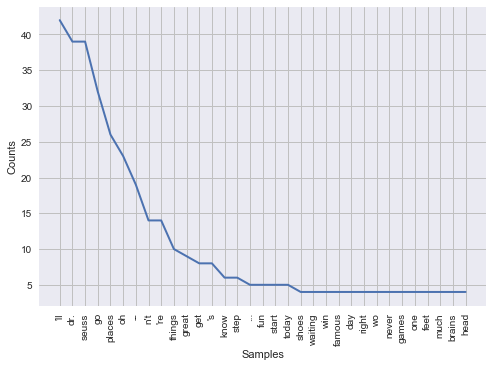

In [49]:
counts.plot(33, cumulative=False)

In [44]:
austen = nltk.text.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
austen.concordance("monstrous", 55, lines=11)

Displaying 11 of 11 matches:
lmer , you shall see a monstrous pretty girl ." He imme
is to marry him . I am monstrous glad of it , for then 
your sister . She is a monstrous lucky girl to get him 
ll like them . Lucy is monstrous pretty , and so good h
" I am sure I shall be monstrous glad of Miss Marianne 
 cheerfulness , " I am monstrous glad to see you -- sor
as it turns out , I am monstrous glad there was never a
y ! for they say he is monstrous fond of her , as well 
t she should ." " I am monstrous glad of it . Good grac
 kind . So then he was monstrous happy , and talked on 
el people . He makes a monstrous deal of money , and th


The corcordance function performs a search for the given token and then also provides the surrounding context.

Jane Austen: Sense and Sensibility
Chapter 19

"Here comes Marianne," cried Sir John. "Now, Palmer, you shall see a monstrous pretty girl."

He immediately went into the passage, opened the front door, and ushered her in himself. Mrs. Jennings asked her, as soon as she appeared, if she had not been to Allenham; and Mrs. Palmer laughed so heartily at the question, as to show she understood it. Mr. Palmer looked up on her entering the room, stared at her some minutes, and then returned to his newspaper. Mrs. Palmer's eye was now caught by the drawings which hung round the room. She got up to examine them.


In [45]:
austen.similar("monstrous")

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast


Given some context surrounding a word, we can discover similar words, e.g. words that that occur frequently in the same context and with a similar distribution